# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Artificial II dataset

In [2]:
Xy = pd.read_csv('./datasets/artificial_II.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
b_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
b_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     1.0  2.0  3.0
1.0   22    0    0
2.0    0   21    0
3.0    0    0   17
     3.0  1.0  2.0
3.0   24    0    0
1.0    0   16    0
2.0    0    0   20
     3.0  1.0  2.0
3.0   18    0    0
1.0    0   16    0
2.0    0    0   26
     2.0  1.0  3.0
2.0   16    0    0
1.0    0   19    0
3.0    0    0   25
     1.0  3.0  2.0
1.0   18    0    0
3.0    0   21    0
2.0    0    0   21
     1.0  3.0  2.0
1.0   19    0    0
3.0    0   27    0
2.0    0    0   14
     3.0  2.0  1.0
3.0   15    0    0
2.0    0   23    0
1.0    0    0   22
     1.0  2.0  3.0
1.0   13    0    0
2.0    0   25    0
3.0    0    0   22
     1.0  3.0  2.0
1.0   19    0    0
3.0    0   24    0
2.0    0    0   17
     1.0  2.0  3.0
1.0   25    0    0
2.0    0   24    0
3.0    0    0   11
     2.0  1.0  3.0
2.0  

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,1.0,2.0,3.0
1.0,20,0,0
2.0,0,19,0
3.0,0,0,20


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     1.0  2.0  3.0
1.0   22    0    0
2.0    0   21    0
3.0    0    0   17
     3.0  1.0  2.0
3.0   24    0    0
1.0    0   16    0
2.0    0    0   20
     3.0  1.0  2.0
3.0   18    0    0
1.0    0   16    0
2.0    0    0   26
     2.0  1.0  3.0
2.0   16    0    0
1.0    0   19    0
3.0    0    0   25
     1.0  3.0  2.0
1.0   18    0    0
3.0    0   21    0
2.0    0    0   21
     1.0  3.0  2.0
1.0   19    0    0
3.0    0   27    0
2.0    0    0   14
     3.0  2.0  1.0
3.0   15    0    0
2.0    0   23    0
1.0    0    0   22
     1.0  2.0  3.0
1.0   13    0    0
2.0    0   25    0
3.0    0    0   22
     1.0  3.0  2.0
1.0   19    0    0
3.0    0   24    0
2.0    0    0   17
     1.0  2.0  3.0
1.0   25    0    0
2.0    0   24    0
3.0    0    0   11
     2.0  1.0  3.0
2.0  

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,1.0,2.0,3.0
1.0,20,0,0
2.0,0,19,0
3.0,0,0,20


# Showing bayes informations computed

In [8]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     1.0  2.0  3.0
1.0   22    0    0
2.0    0   21    0
3.0    0    0   17
     3.0  1.0  2.0
3.0   24    0    0
1.0    0   16    0
2.0    0    0   20
     3.0  1.0  2.0
3.0   18    0    0
1.0    0   16    0
2.0    0    0   26
     2.0  1.0  3.0
2.0   16    0    0
1.0    0   19    0
3.0    0    0   25
     1.0  3.0  2.0
1.0   18    0    0
3.0    0   21    0
2.0    0    0   21
     1.0  3.0  2.0
1.0   19    0    0
3.0    0   27    0
2.0    0    0   14
     3.0  2.0  1.0
3.0   15    0    0
2.0    0   23    0
1.0    0    0   22
     1.0  2.0  3.0
1.0   13    0    0
2.0    0   25    0
3.0    0    0   22
     1.0  3.0  2.0
1.0   19    0    0
3.0    0   24    0
2.0    0    0   17
     1.0  2.0  3.0
1.0   25    0    0
2.0    0   24    0
3.0    0    0   11
     2.0  1.0  3

In [9]:
confusion_matrix_mean(b_confusion_matrix_list)

,1.0,2.0,3.0
1.0,20,0,0
2.0,0,19,0
3.0,0,0,20


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
            0         1
287  0.628060  0.999934
191 -0.874027  1.189717
190 -1.151050  1.283939
71  -1.166393 -0.981176
79  -1.292500 -1.241504
..        ...       ...
152 -1.203083  1.045785
285  1.260577  0.821875
56  -1.047180 -1.048616
252  1.047449  1.343410
233  0.638736  0.975226

[240 rows x 2 columns]
Test dataset:
            0         1
30  -1.103214 -0.910942
164 -0.757936  1.342960
86  -1.293429 -1.194890
231  1.050757  0.822016
184 -1.199352  0.909633
163 -0.725721  1.215186
224  1.071970  1.003582
148 -1.031252  0.954299
234  1.000772  0.903955
62  -0.785236 -1.096612
218  0.979078  0.981776
256  0.918403  0.557031
175 -1.121151  0.697464
181 -0.893702  1.002027
73  -1.014745 -1.085242
271  1.249368  1.139974
169 -0.933978  1.022088
282  0.900284  0.954124
182 -1.152465  1.162949
93  -0.927113 -0.750590
6   -0.843245 -0.957184
202  0.971098  0.897272
215  0.759662  0.830326
232  1.106332  1.066787
42  -0.981614 -1.021227
207  0.928774  1.326514
47  -0.6253

# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

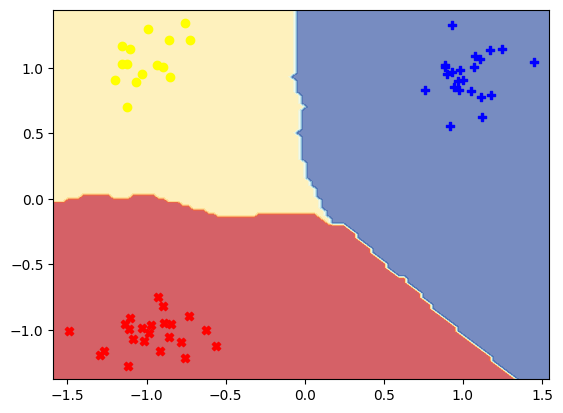

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

one = np.where(knn_y_pred == 1)
two = np.where(knn_y_pred == 2)
three = np.where(knn_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()

# Plotting dmc decision surface

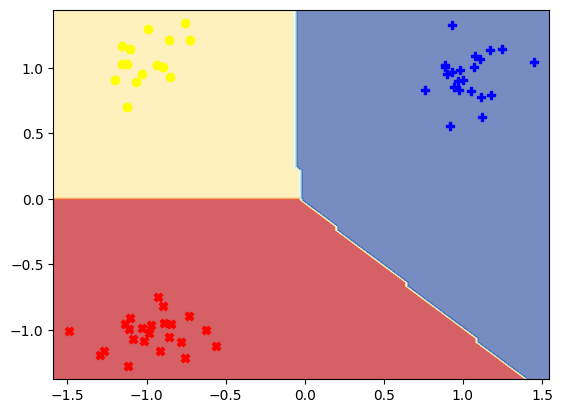

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

one = np.where(dmc_y_pred == 1)
two = np.where(dmc_y_pred == 2)
three = np.where(dmc_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()

# Plotting naive bayes decision surface

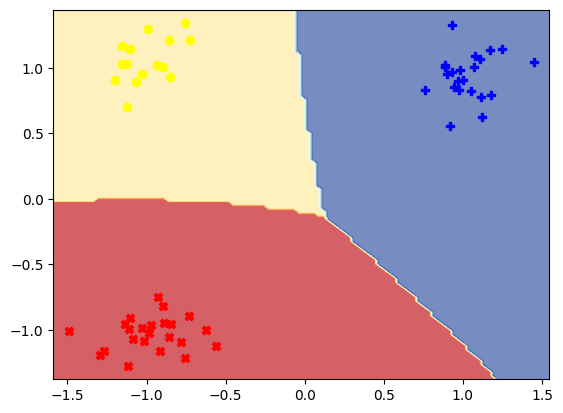

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

one = np.where(b_y_pred == 1)
two = np.where(b_y_pred == 2)
three = np.where(b_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()